In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the three datasets
ab_test_data = pd.read_csv('data/ab_test_data.csv')
app_data = pd.read_csv('data/app_data.csv')
appointments_data = pd.read_csv('data/appointments_data.csv')

# Perform a left join on 'patient_id' across the three datasets
merged_data = ab_test_data.merge(app_data, on='patient_id', how='left').merge(appointments_data, on='patient_id', how='left')
# Checking for missing values (NaNs) in all three dataframes
ab_test_na = ab_test_data.isna().sum()
app_data_na = app_data.isna().sum()
appointments_data_na = appointments_data.isna().sum()
merged_data_na = merged_data.isna().sum()
ab_test_na, app_data_na, appointments_data_na, merged_data_na

(patient_id        0
 group             0
 event_name        0
 event_datetime    0
 dtype: int64,
 patient_id        0
 traffic_source    0
 device            0
 dtype: int64,
 patient_id            0
 age                   0
 gender                0
 doctor_name           0
 appointment_reason    0
 appointment_date      0
 appointment_status    0
 dtype: int64,
 patient_id            0
 group                 0
 event_name            0
 event_datetime        0
 traffic_source        0
 device                0
 age                   0
 gender                0
 doctor_name           0
 appointment_reason    0
 appointment_date      0
 appointment_status    0
 dtype: int64)

# A/B test data

In [2]:
ab_test_data

,patient_id,group,event_name,event_datetime
0,1,Control,attended_appointment,2023-02-05 15:40:21
1,2,Test,reminder_sent,2023-05-07 09:19:13
2,2,Test,reminder_viewed,2023-05-08 04:25:10
3,2,Test,appointment_confirmed,2023-05-08 04:26:36
4,2,Test,attended_appointment,2023-05-09 10:34:13
...,...,...,...,...
5655,2673,Control,attended_appointment,2023-01-03 09:56:57
5656,2674,Control,attended_appointment,2023-07-18 10:42:54
5657,2675,Control,attended_appointment,2023-02-14 16:50:58
5658,2677,Control,attended_appointment,2023-05-21 13:26:23


In [50]:

# Group the data
control_attended = ab_test_data[(ab_test_data['group'] == 'Control') & (ab_test_data['event_name'] == 'attended_appointment')]
test_attended = ab_test_data[(ab_test_data['group'] == 'Test') & (ab_test_data['event_name'] == 'attended_appointment')]

# Total number of entries in each group
total_control = ab_test_data[ab_test_data['group'] == 'Control'].shape[0]
total_test = ab_test_data[ab_test_data['group'] == 'Test'].shape[0]

# Number of attended appointments in each group
attended_control = control_attended.shape[0]
attended_test = test_attended.shape[0]

# Attendance rates
control_attendance_rate = (attended_control / total_control) * 100
test_attendance_rate = (attended_test / total_test) * 100

# Provide the counts for total and attended appointments in both groups
control_attendance_counts = {
    'Total Control Group': total_control,
    'Attended Control Group': attended_control
}

test_attendance_counts = {
    'Total Test Group': total_test,
    'Attended Test Group': attended_test
}

# Display the results
print("Control Group Attendance Rate:", control_attendance_rate)
print("Test Group Attendance Rate:", test_attendance_rate)

print("Control Group Counts:", control_attendance_counts)
print("Test Group Counts:", test_attendance_counts)


Control Group Attendance Rate: 100.0
Test Group Attendance Rate: 18.07555833855145
Control Group Counts: {'Total Control Group': 869, 'Attended Control Group': 869}
Test Group Counts: {'Total Test Group': 4791, 'Attended Test Group': 866}


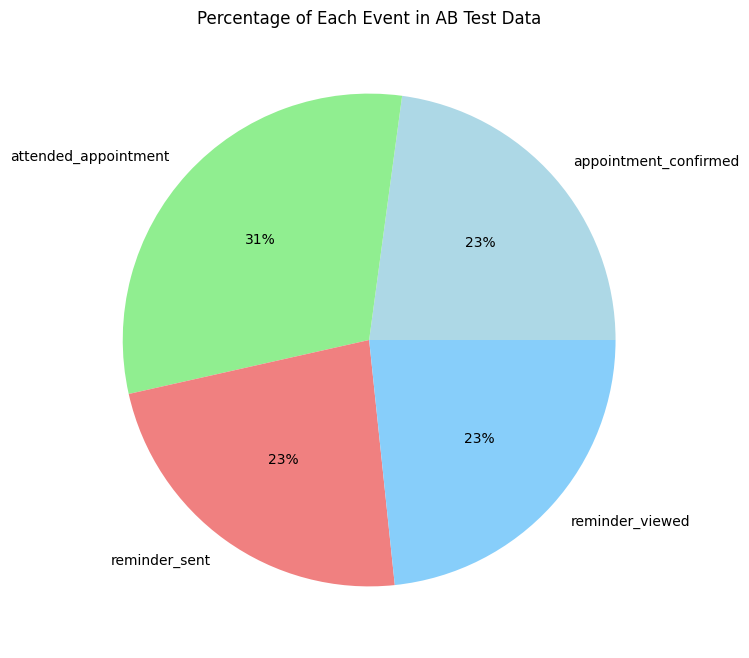

In [48]:
# Grouping by 'event_name' and calculating the count
grouped_ab_test_data = ab_test_data.groupby('event_name').size().reset_index(name='count')

# Calculate the percentage for each event
grouped_ab_test_data['percentage'] = (grouped_ab_test_data['count'] / grouped_ab_test_data['count'].sum()) * 100

# Plotting the pie chart with percentages for each event
plt.figure(figsize=(8, 8))
plt.pie(grouped_ab_test_data['percentage'], labels=grouped_ab_test_data['event_name'], autopct='%1.0f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Percentage of Each Event in AB Test Data')

# Display the pie chart
plt.show()


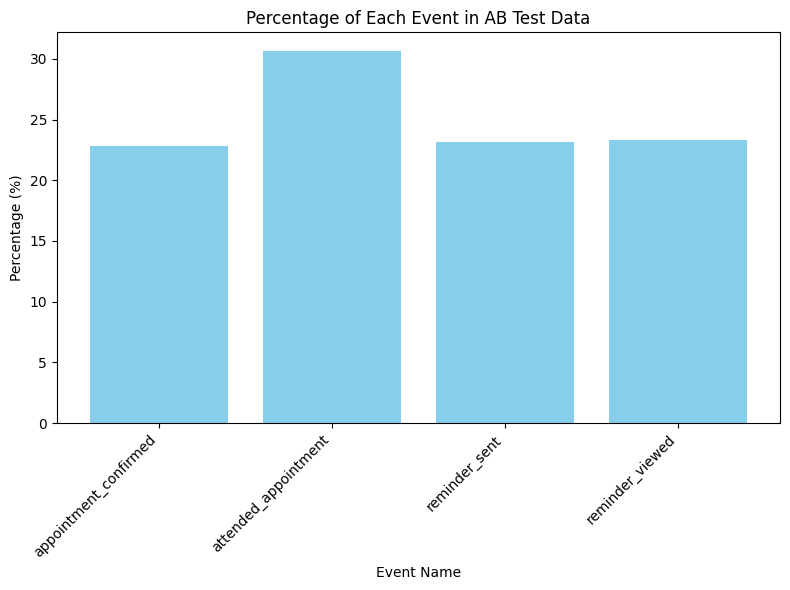

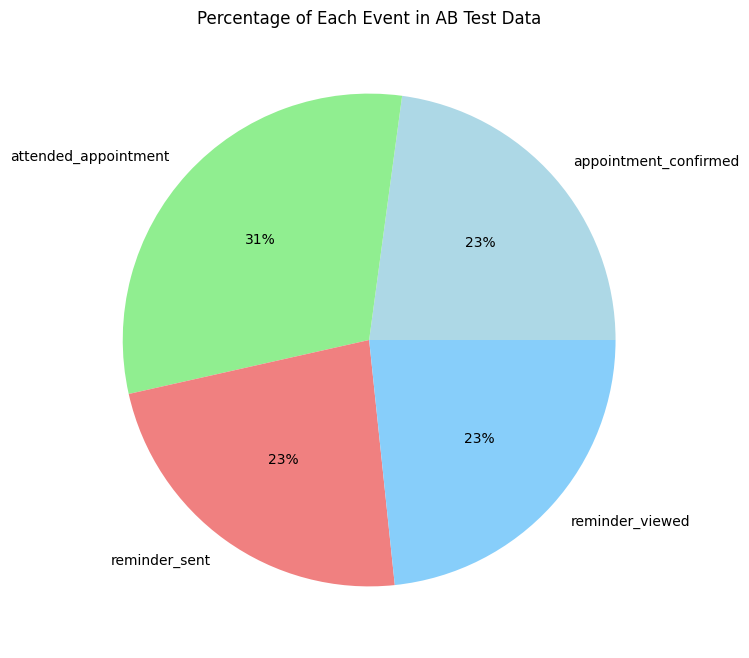

In [27]:
# Calculate the percentage of each event
grouped_ab_test_data['percentage'] = (grouped_ab_test_data['count'] / grouped_ab_test_data['count'].sum()) * 100

# Plotting the bar chart with percentages
plt.figure(figsize=(8, 6))
plt.bar(grouped_ab_test_data['event_name'], grouped_ab_test_data['percentage'], color='skyblue')
plt.xlabel('Event Name')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Event in AB Test Data')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Plotting the pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(grouped_ab_test_data['percentage'], labels=grouped_ab_test_data['event_name'], autopct='%1.0f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Percentage of Each Event in AB Test Data')

# Display the pie chart
plt.show()

# App Data

In [3]:
app_data

,patient_id,traffic_source,device
0,1,Organic Search,IOS 17.4
1,2,Meta Ads,IOS 16.5
2,3,Direct,Android 8.3
3,4,Direct,Android 12.1
4,5,Direct,IOS 13.4
...,...,...,...
2673,2674,Referral,Android 9.1
2674,2675,Meta Ads,Android 12.5
2675,2676,Organic Search,Android 10.3
2676,2677,Organic Search,Android 10.1


In [9]:
pd.DataFrame(app_data['traffic_source'].unique())

,0
0,Organic Search
1,Meta Ads
2,Direct
3,Referral
4,Google Ads
5,Apple Ads


In [13]:
android_data = app_data[app_data['device'].str.lower().str.contains('android')]
ios_data = app_data[app_data['device'].str.lower().str.contains('ios')]

In [14]:
android_data.count()

patient_id        1252
traffic_source    1252
device            1252
dtype: int64

In [12]:
ios_data.count()

patient_id        1426
traffic_source    1426
device            1426
dtype: int64

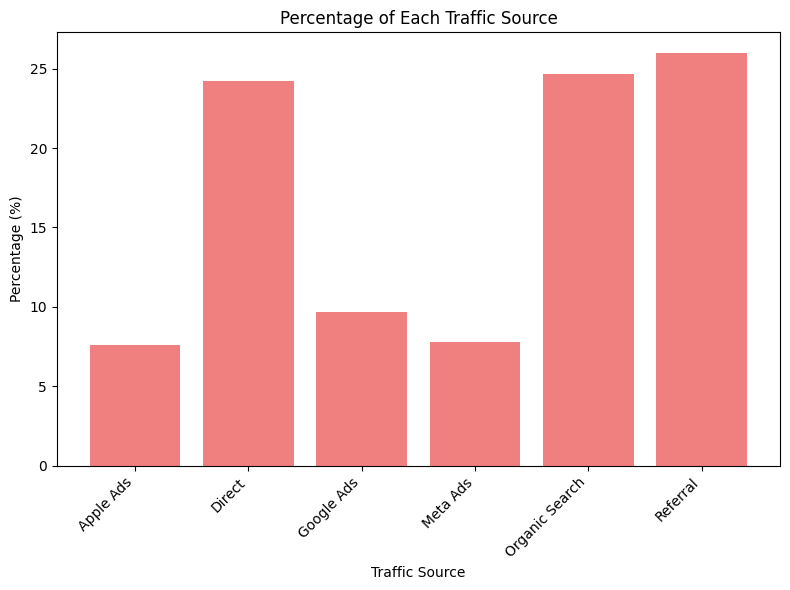

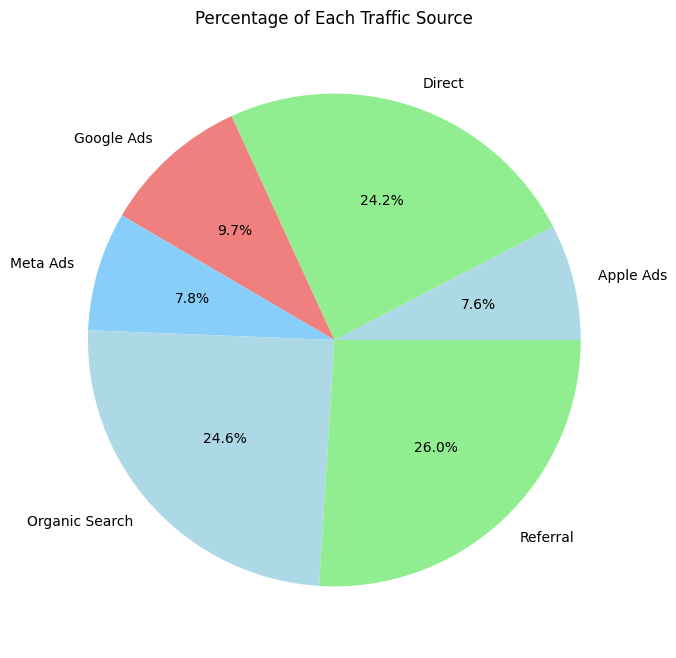

In [26]:
# Grouping the app_data by 'traffic_source' and calculating the count and percentages
grouped_traffic_source = app_data.groupby('traffic_source').size().reset_index(name='count')
grouped_traffic_source['percentage'] = (grouped_traffic_source['count'] / grouped_traffic_source['count'].sum()) * 100

# Plotting the bar chart for traffic source with percentages
plt.figure(figsize=(8, 6))
plt.bar(grouped_traffic_source['traffic_source'], grouped_traffic_source['percentage'], color='lightcoral')
plt.xlabel('Traffic Source')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Traffic Source')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the pie chart for traffic source
plt.figure(figsize=(8, 8))
plt.pie(grouped_traffic_source['percentage'], labels=grouped_traffic_source['traffic_source'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Percentage of Each Traffic Source')
plt.show()


# Appointments Data

In [4]:
appointments_data

,patient_id,age,gender,doctor_name,appointment_reason,appointment_date,appointment_status
0,1,38,Female,Dr. Smith,Screening for COVID,2023-02-05,Attended
1,2,53,Male,Dr. Brown,Ultrasound,2023-05-09,Attended
2,3,67,Female,Dr. Smith,Annual Exam,2023-01-30,Attended
3,4,63,Female,Dr. Johnson,Flu Shot,2023-04-08,Not Attended
4,5,77,Male,Dr. Jones,Allergy injection,2023-02-24,Not Attended
...,...,...,...,...,...,...,...
2673,2674,31,Female,Dr. Smith,Allergy injection,2023-07-18,Attended
2674,2675,71,Male,Dr. Jones,Annual Exam,2023-02-14,Attended
2675,2676,75,Female,Dr.Brown,Screening for COVID,2023-07-19,Not Attended
2676,2677,74,Male,Dr. Williams,Ultrasound,2023-05-21,Attended


In [32]:
# Grouping by 'appointment_reason' and counting, then ordering by count from most to least
grouped_appointments = appointments_data.groupby('appointment_reason').size().reset_index(name='count')
grouped_appointments = grouped_appointments.sort_values(by='count', ascending=False)

grouped_appointments.reset_index(drop=True)

,appointment_reason,count
0,Annual Exam,415
1,Hypertension,398
2,Ultrasound,381
3,Screening for COVID,378
4,Allergy injection,376
5,Asthma,365
6,Flu Shot,365


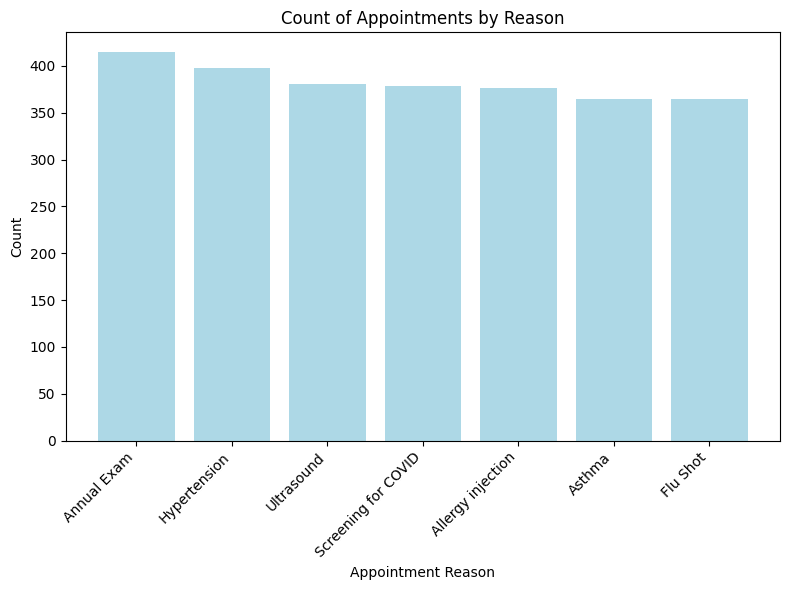

In [33]:
# Visualizing the appointment reason counts with a bar chart
plt.figure(figsize=(8, 6))
plt.bar(grouped_appointments['appointment_reason'], grouped_appointments['count'], color='lightblue')
plt.xlabel('Appointment Reason')
plt.ylabel('Count')
plt.title('Count of Appointments by Reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


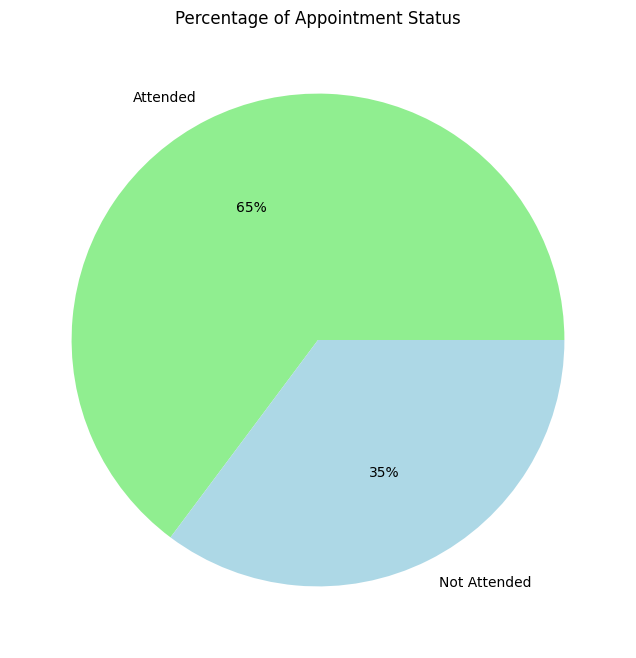

In [38]:
# Grouping by 'appointment_status' and counting, then ordering by count from highest to lowest
grouped_status = appointments_data.groupby('appointment_status').size().reset_index(name='count')
grouped_status = grouped_status.sort_values(by='count', ascending=False).reset_index(drop=True)

# Calculate the percentage for each appointment status
grouped_status['percentage'] = (grouped_status['count'] / grouped_status['count'].sum()) * 100

# Plotting the pie chart with percentages for appointment status
plt.figure(figsize=(8, 8))
plt.pie(grouped_status['percentage'], labels=grouped_status['appointment_status'], autopct='%1.0f%%', colors=['lightgreen', 'lightblue'])
plt.title('Percentage of Appointment Status')

# Display the pie chart
plt.show()


In [40]:
# Grouping by 'doctor_name' and counting the occurrences, then ordering by count from top to down
grouped_doctors = appointments_data.groupby('doctor_name').size().reset_index(name='count')
grouped_doctors = grouped_doctors.sort_values(by='count', ascending=False).reset_index(drop=True)

grouped_doctors

,doctor_name,count
0,Dr. Jones,467
1,Dr. Smith,464
2,Dr.Brown,464
3,Dr. Brown,444
4,Dr. Williams,433
5,Dr. Johnson,406


In [45]:
# Define age groups and categorize patients
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100']
appointments_data['age_group'] = pd.cut(appointments_data['age'], bins=bins, labels=labels, right=True)

# Calculate attendance rate for each age group and round the percentage
attendance_rate = appointments_data.groupby('age_group').apply(
    lambda x: round((x['appointment_status'] == 'Attended').mean() * 100)
).reset_index(name='attendance_rate')

attendance_rate

/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_27426/4242993721.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_rate = appointments_data.groupby('age_group').apply(
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_27426/4242993721.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  attendance_rate = appointments_data.groupby('age_group').apply(


,age_group,attendance_rate
0,0-18,64
1,19-35,67
2,36-50,63
3,51-65,64
4,66-80,65
5,81-100,64


# Merged Data

In [5]:
merged_data

,patient_id,group,event_name,event_datetime,traffic_source,device,age,gender,doctor_name,appointment_reason,appointment_date,appointment_status
0,1,Control,attended_appointment,2023-02-05 15:40:21,Organic Search,IOS 17.4,38,Female,Dr. Smith,Screening for COVID,2023-02-05,Attended
1,2,Test,reminder_sent,2023-05-07 09:19:13,Meta Ads,IOS 16.5,53,Male,Dr. Brown,Ultrasound,2023-05-09,Attended
2,2,Test,reminder_viewed,2023-05-08 04:25:10,Meta Ads,IOS 16.5,53,Male,Dr. Brown,Ultrasound,2023-05-09,Attended
3,2,Test,appointment_confirmed,2023-05-08 04:26:36,Meta Ads,IOS 16.5,53,Male,Dr. Brown,Ultrasound,2023-05-09,Attended
4,2,Test,attended_appointment,2023-05-09 10:34:13,Meta Ads,IOS 16.5,53,Male,Dr. Brown,Ultrasound,2023-05-09,Attended
...,...,...,...,...,...,...,...,...,...,...,...,...
5655,2673,Control,attended_appointment,2023-01-03 09:56:57,Direct,IOS 16.3,81,Male,Dr. Brown,Screening for COVID,2023-01-03,Attended
5656,2674,Control,attended_appointment,2023-07-18 10:42:54,Referral,Android 9.1,31,Female,Dr. Smith,Allergy injection,2023-07-18,Attended
5657,2675,Control,attended_appointment,2023-02-14 16:50:58,Meta Ads,Android 12.5,71,Male,Dr. Jones,Annual Exam,2023-02-14,Attended
5658,2677,Control,attended_appointment,2023-05-21 13:26:23,Organic Search,Android 10.1,74,Male,Dr. Williams,Ultrasound,2023-05-21,Attended


In [51]:
control_attended_merged_data = merged_data[(merged_data['group'] == 'Control') & (merged_data['event_name'] == 'attended_appointment')]


In [52]:
control_attended_merged_data

,patient_id,group,event_name,event_datetime,traffic_source,device,age,gender,doctor_name,appointment_reason,appointment_date,appointment_status
0,1,Control,attended_appointment,2023-02-05 15:40:21,Organic Search,IOS 17.4,38,Female,Dr. Smith,Screening for COVID,2023-02-05,Attended
11,6,Control,attended_appointment,2023-02-22 10:25:49,Direct,Android 11.3,21,Female,Dr. Williams,Hypertension,2023-02-22,Attended
27,14,Control,attended_appointment,2023-01-05 17:55:43,Google Ads,Android 10.1,73,Male,Dr. Smith,Annual Exam,2023-01-05,Attended
28,15,Control,attended_appointment,2023-03-28 14:08:19,Organic Search,Android 12.2,40,Male,Dr. Johnson,Asthma,2023-03-28,Attended
32,17,Control,attended_appointment,2023-03-10 12:35:48,Direct,IOS 14.4,21,Female,Dr. Jones,Asthma,2023-03-10,Attended
...,...,...,...,...,...,...,...,...,...,...,...,...
5655,2673,Control,attended_appointment,2023-01-03 09:56:57,Direct,IOS 16.3,81,Male,Dr. Brown,Screening for COVID,2023-01-03,Attended
5656,2674,Control,attended_appointment,2023-07-18 10:42:54,Referral,Android 9.1,31,Female,Dr. Smith,Allergy injection,2023-07-18,Attended
5657,2675,Control,attended_appointment,2023-02-14 16:50:58,Meta Ads,Android 12.5,71,Male,Dr. Jones,Annual Exam,2023-02-14,Attended
5658,2677,Control,attended_appointment,2023-05-21 13:26:23,Organic Search,Android 10.1,74,Male,Dr. Williams,Ultrasound,2023-05-21,Attended
